# PROJECT - IPL DATA ANALYSIS 

### Step 0 - Import Libraries

In [2]:
# Step-0 : Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 - Load Dataset

In [3]:
# Step-1 : Load Dataset
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


### Step 2: Dataset Overview

In [4]:
print(matches.shape)
print(deliveries.shape)

matches.info()
matches.isnull().sum()


(1095, 20)
(260920, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   obj

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

### Step 3 — Top 10 Venues with Most Matches

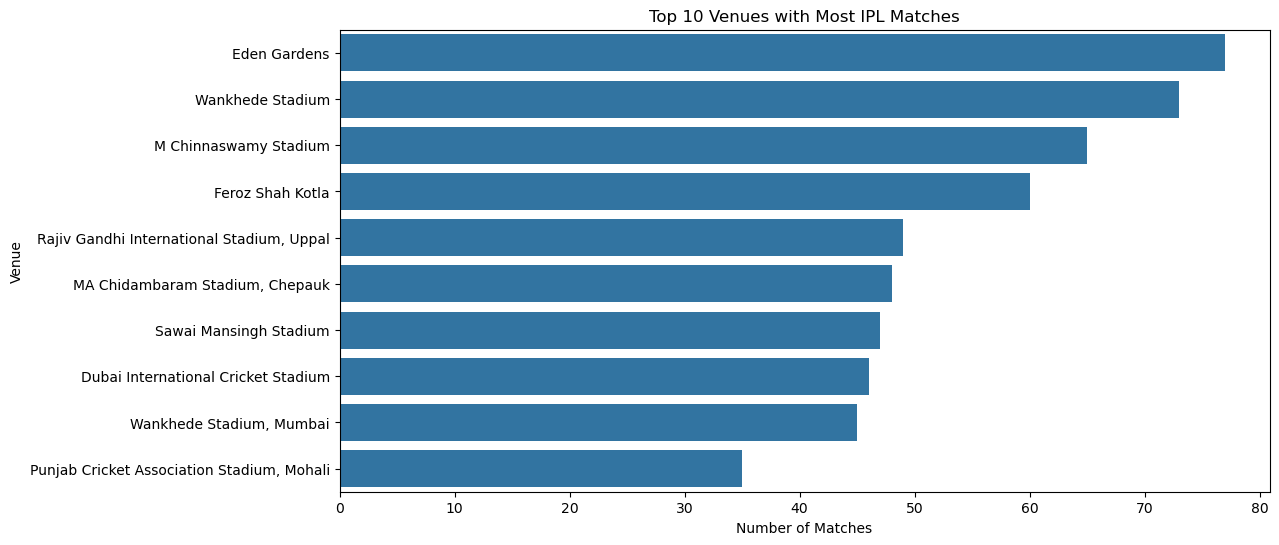

In [5]:
venue_counts = matches['venue'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=venue_counts.values, y=venue_counts.index)
plt.title("Top 10 Venues with Most IPL Matches")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()


### Step 4 — Most Successful Teams

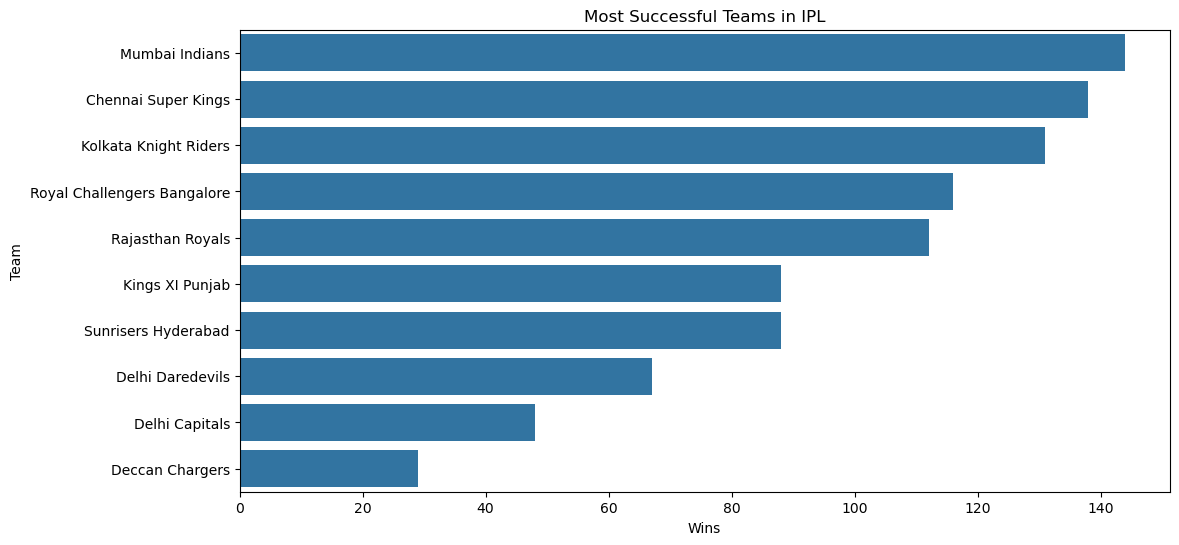

In [6]:
team_wins = matches['winner'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=team_wins.values, y=team_wins.index)
plt.title("Most Successful Teams in IPL")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()


### Step 5 — Season Wise Winners

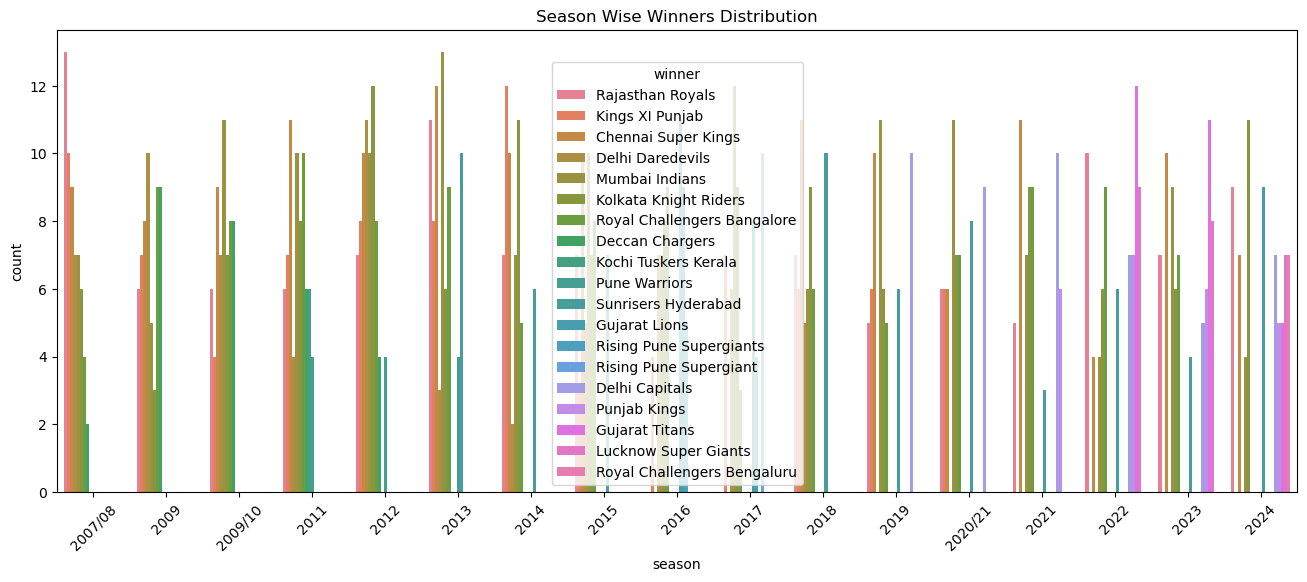

In [7]:
season_winner = matches.groupby('season')['winner'].value_counts().reset_index(name='count')

plt.figure(figsize=(16,6))
sns.barplot(data=season_winner, x='season', y='count', hue='winner')
plt.title("Season Wise Winners Distribution")
plt.xticks(rotation=45)
plt.show()


### Step 6: Top 10 Run Scorers

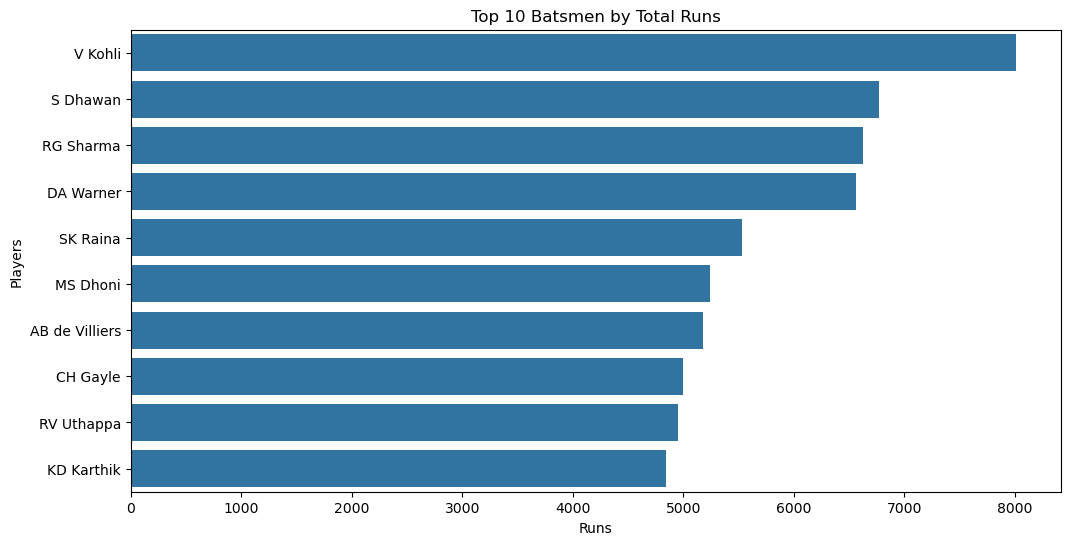

In [8]:
top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index)
plt.title("Top 10 Batsmen by Total Runs")
plt.xlabel("Runs")
plt.ylabel("Players")
plt.show()


### Step 7 — Top 10 Six Hitters

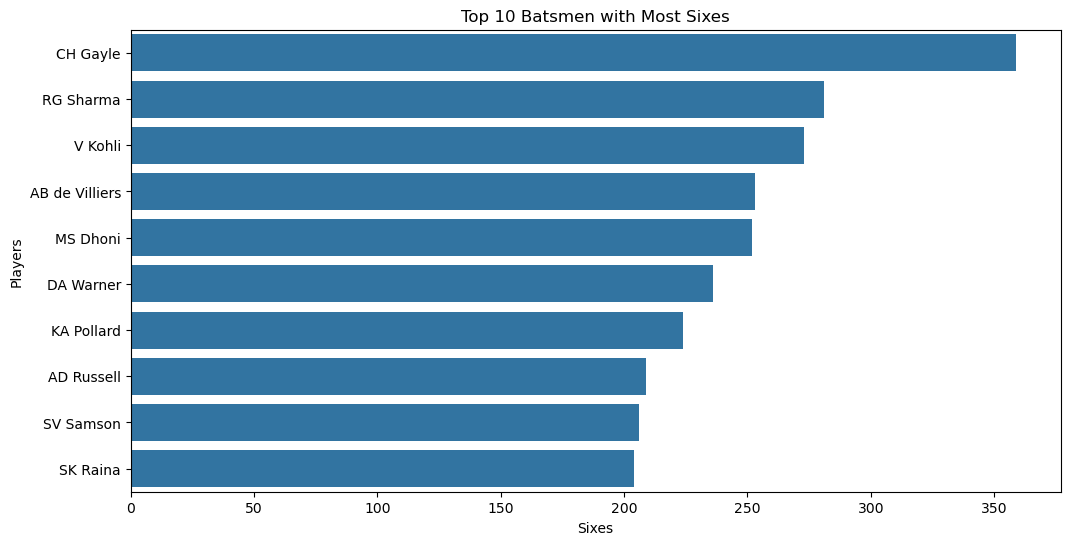

In [9]:
sixes = (deliveries[deliveries['batsman_runs']==6]
         .groupby('batter')['batsman_runs']
         .count()
         .sort_values(ascending=False)
         .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=sixes.values, y=sixes.index)
plt.title("Top 10 Batsmen with Most Sixes")
plt.xlabel("Sixes")
plt.ylabel("Players")
plt.show()


### Step 8 — Top 10 Boundary Hitters (Fours)

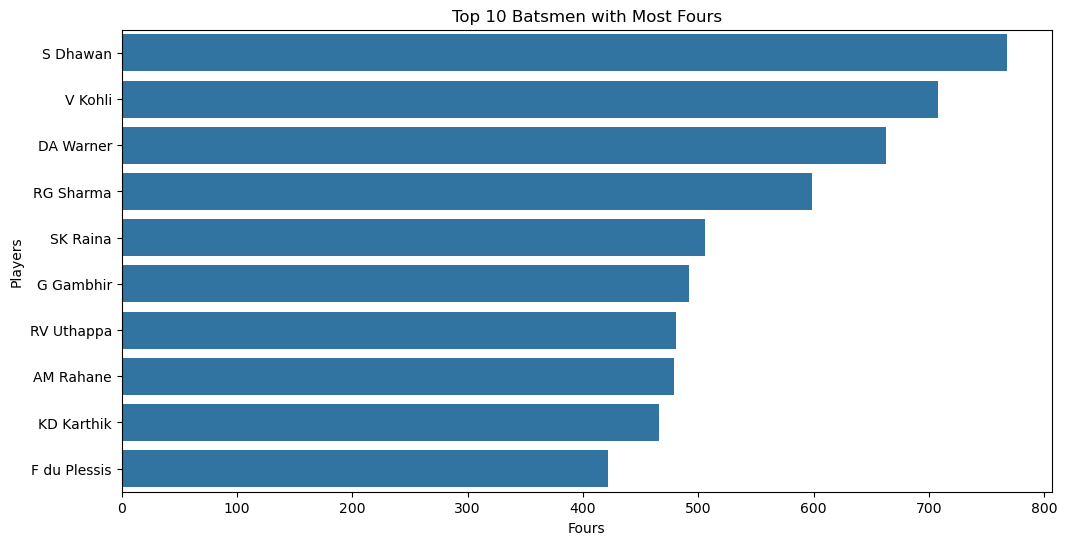

In [10]:
fours = (deliveries[deliveries['batsman_runs']==4]
         .groupby('batter')['batsman_runs']
         .count()
         .sort_values(ascending=False)
         .head(10))

plt.figure(figsize=(12,6))
sns.barplot(x=fours.values, y=fours.index)
plt.title("Top 10 Batsmen with Most Fours")
plt.xlabel("Fours")
plt.ylabel("Players")
plt.show()


### Step 9 — Best Strike Rate (Min 500 Balls)

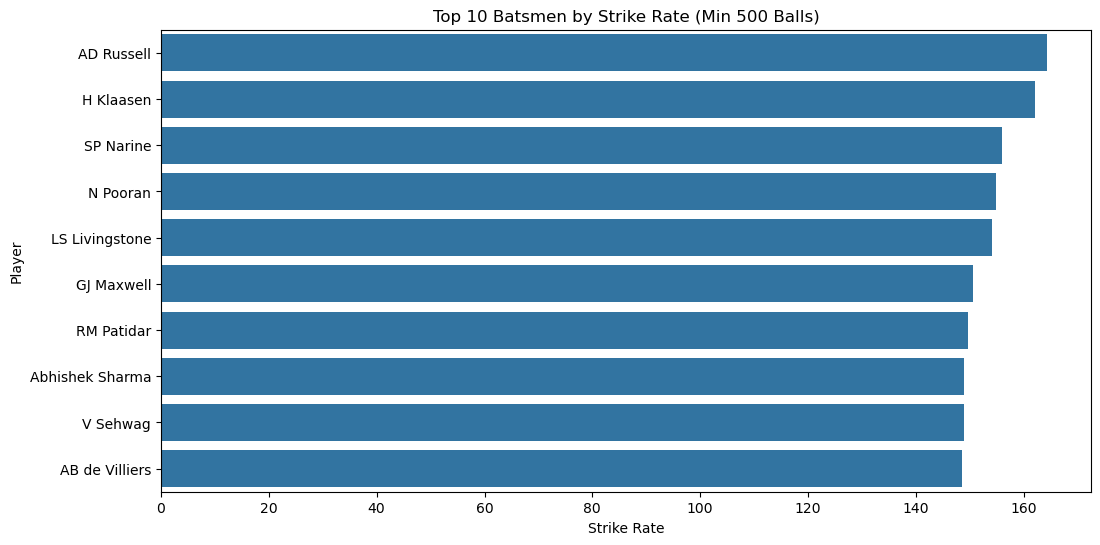

In [11]:
balls_faced = deliveries.groupby('batter')['ball'].count()
runs = deliveries.groupby('batter')['batsman_runs'].sum()

strike_rate = (runs / balls_faced) * 100
strike_rate = strike_rate[balls_faced > 500].sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=strike_rate.values, y=strike_rate.index)
plt.title("Top 10 Batsmen by Strike Rate (Min 500 Balls)")
plt.xlabel("Strike Rate")
plt.ylabel("Player")
plt.show()


### Step 10 — Top 10 Wicket Takers

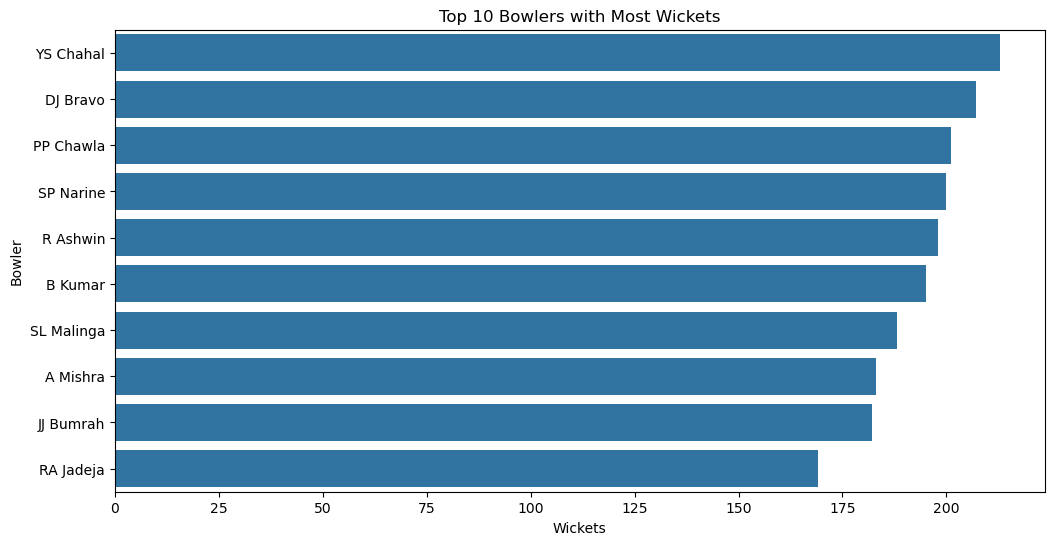

In [12]:
wickets = deliveries[deliveries['is_wicket']==1]['bowler'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=wickets.values, y=wickets.index)
plt.title("Top 10 Bowlers with Most Wickets")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


### Step 11 — Best Bowling Strike Rate

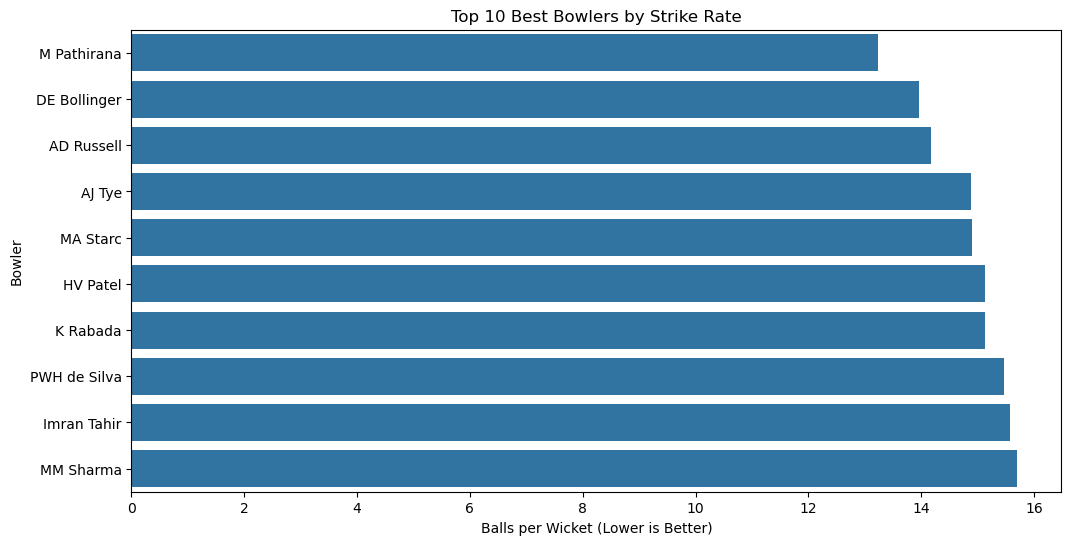

In [13]:
Balls_bowled = deliveries.groupby('bowler')['ball'].count()
Wickets = deliveries[deliveries['is_wicket']==1].groupby('bowler')['is_wicket'].count()

bowler_sr = Balls_bowled / Wickets
mask = (Balls_bowled >= 500) & (Wickets >= 20)
bowler_sr = bowler_sr[mask].sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=bowler_sr.values, y=bowler_sr.index)
plt.title("Top 10 Best Bowlers by Strike Rate")
plt.xlabel("Balls per Wicket (Lower is Better)")
plt.ylabel("Bowler")
plt.show()


### Step 12 — Best Economy Rate

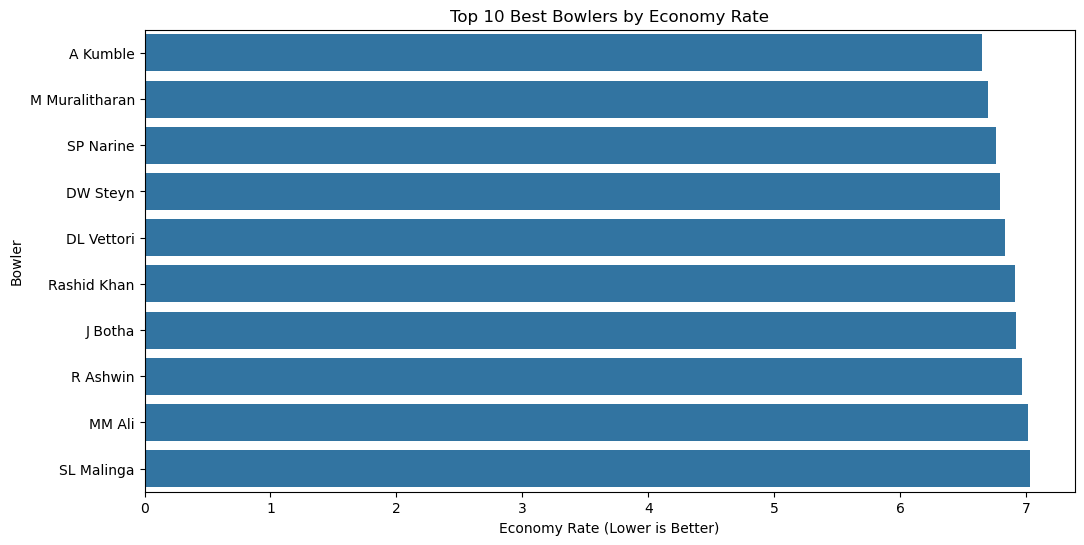

In [14]:
runs_conceded = deliveries.groupby('bowler')['total_runs'].sum()
overs_bowled = Balls_bowled / 6

economy = runs_conceded / overs_bowled
economy = economy[mask].sort_values().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=economy.values, y=economy.index)
plt.title("Top 10 Best Bowlers by Economy Rate")
plt.xlabel("Economy Rate (Lower is Better)")
plt.ylabel("Bowler")
plt.show()


Conclusion & Insights

📌 Key Findings:

Mumbai Indians are the most successful team

Eden Gardens hosted maximum matches

Virat Kohli / Rohit Sharma → Leading run scorers

Chris Gayle → King of Sixes

Dhawan → Most fours

Russell / Maxwell → Best strike rates

Narine / Malinga / Rashid → Most effective bowlers

Toss win gives slight advantage (~50–55%)

⚡ IPL me success = Strong finishers + Economical bowlers ✔

Thanks for Reading!

This IPL Data Analysis Project was completed using Python & Data Science techniques.